In [1]:
import pandas as pd
import numpy as np

In [3]:
PC=pd.read_csv("/home/jacky/OV/OC/screenmol_protein_coding.csv",index_col=0)
PC

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_name,gene_type
id,,,,,,,,
ENSG00000000003.15,4738.524767,-0.052116,0.086555,-0.602113,0.547099,0.831329,TSPAN6,protein_coding
ENSG00000000005.6,14.270190,-0.445981,0.282946,-1.576206,0.114978,0.455055,TNMD,protein_coding
ENSG00000000419.13,3220.524439,-0.003427,0.076052,-0.045057,0.964062,0.989999,DPM1,protein_coding
ENSG00000000457.14,738.604349,-0.072211,0.059455,-1.214556,0.224536,0.599255,SCYL3,protein_coding
ENSG00000000460.17,541.357991,-0.223419,0.087671,-2.548386,0.010822,0.166688,C1orf112,protein_coding
...,...,...,...,...,...,...,...,...
ENSG00000288661.1,0.000000,NaN,NaN,NaN,NaN,NaN,AL451106.1,protein_coding
ENSG00000288669.1,0.105321,-0.021028,0.844755,-0.024893,0.980141,NaN,AC008763.4,protein_coding
ENSG00000288671.1,0.000000,NaN,NaN,NaN,NaN,NaN,AC006486.3,protein_coding


In [4]:
#only keep gene_name, padj and log2FoldChange
PC=PC[['gene_name','padj','log2FoldChange']]
PC

,gene_name,padj,log2FoldChange
id,,,
ENSG00000000003.15,TSPAN6,0.831329,-0.052116
ENSG00000000005.6,TNMD,0.455055,-0.445981
ENSG00000000419.13,DPM1,0.989999,-0.003427
ENSG00000000457.14,SCYL3,0.599255,-0.072211
ENSG00000000460.17,C1orf112,0.166688,-0.223419
...,...,...,...
ENSG00000288661.1,AL451106.1,NaN,NaN
ENSG00000288669.1,AC008763.4,NaN,-0.021028
ENSG00000288671.1,AC006486.3,NaN,NaN


In [5]:
#make the first column as index
PC=PC.set_index('gene_name')
PC

,padj,log2FoldChange
gene_name,,
TSPAN6,0.831329,-0.052116
TNMD,0.455055,-0.445981
DPM1,0.989999,-0.003427
SCYL3,0.599255,-0.072211
C1orf112,0.166688,-0.223419
...,...,...
AL451106.1,NaN,NaN
AC008763.4,NaN,-0.021028
AC006486.3,NaN,NaN


In [6]:
#remove rows that have NA
PC=PC.dropna()
PC

,padj,log2FoldChange
gene_name,,
TSPAN6,0.831329,-0.052116
TNMD,0.455055,-0.445981
DPM1,0.989999,-0.003427
SCYL3,0.599255,-0.072211
C1orf112,0.166688,-0.223419
...,...,...
AC020765.6,0.614412,-0.326286
AC010980.1,0.290005,-0.349896
AC004233.4,0.949024,-0.034202


In [7]:
#check any empty rows
PC.isnull().sum()


padj              0
log2FoldChange    0
dtype: int64

In [8]:
#check duplicated rows
PC.duplicated().sum()


0

In [9]:
#save as a new csv file
PC.to_csv("/home/jacky/OV/OC/screenmol_protein_coding_clean.csv")


### volcano function

In [10]:
import matplotlib.pyplot as plt

def volcano_plot(data):
    """
    Generate a volcano plot based on gene expression data.
    
    Parameters:
    - data: Pandas DataFrame containing the gene expression data. It should have columns named 'padj' and 'log2FoldChange'.
    
    Returns:
    - None (displays the plot)
    """
    # Extract p-values and log-fold changes from the DataFrame
    p_values = data['padj']
    log_fold_changes = data['log2FoldChange']

    # Set the significance threshold for coloring
    significance_threshold = 0.05

    # Set the size and color of significant and non-significant points
    sig_color = 'red'
    non_sig_color = 'gray'
    alpha = 0.5

    # Create the volcano plot
    plt.scatter(log_fold_changes, -1 * (p_values.apply(lambda x: -1 if x < significance_threshold else 1)), color=[sig_color if p < significance_threshold else non_sig_color for p in p_values], alpha=alpha)

    # Add labels and title
    plt.xlabel('log2 Fold Change')
    plt.ylabel('-log10(p-value)')
    plt.title('Volcano Plot')

    # Show the plot
    plt.show()


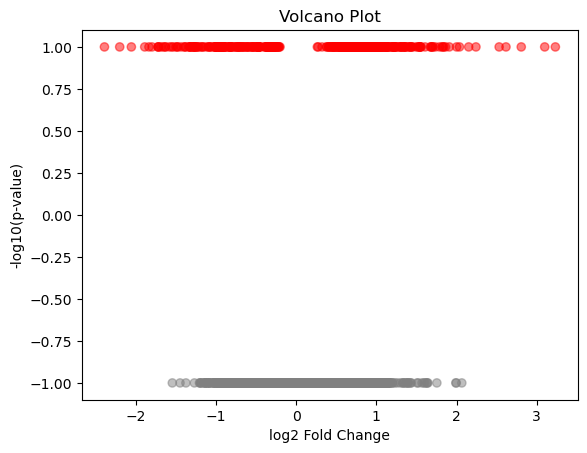